<a href="https://colab.research.google.com/github/tunhu-da/Synthetic-Financial-Dataset-EDA/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [2]:
!pip install kaggle

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import warnings

In [87]:
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')

# Data Collection

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"
!mkdir -p /content/.kaggle
!cp kaggle.json /content/.kaggle/

In [4]:
!kaggle datasets download -d ealaxi/paysim1


Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
 96% 171M/178M [00:01<00:00, 167MB/s]
100% 178M/178M [00:01<00:00, 147MB/s]


In [5]:
!unzip /content/paysim1.zip -d /content/

Archive:  /content/paysim1.zip
  inflating: /content/PS_20174392719_1491204439457_log.csv  


In [7]:
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [13]:
df.shape

(6362620, 11)

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [29]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620.0,6362620.0
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,2.0,2.0
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,0.0,0.0
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,6354407.0,6362604.0
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,NaN,NaN
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,NaN,NaN
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,NaN,NaN
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Data Cleaning

In [14]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [16]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [17]:
df.duplicated().sum()

0

There is no null, NaN values, no duplicated rows

In [23]:
df.nunique()

,0
step,743
type,5
amount,5316900
nameOrig,6353307
oldbalanceOrg,1845844
newbalanceOrig,2682586
nameDest,2722362
oldbalanceDest,3614697
newbalanceDest,3555499
isFraud,2


In [98]:
df['type'] = df['type'].astype('category')
df['isFraud'] = df['isFraud'].astype(np.int8)
df['nameOrig'] = df['nameOrig'].astype('string')
df['nameDest'] = df['nameDest'].astype('string')

df['amount'] = df['amount'].astype(np.float64)

# Unvariate



type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


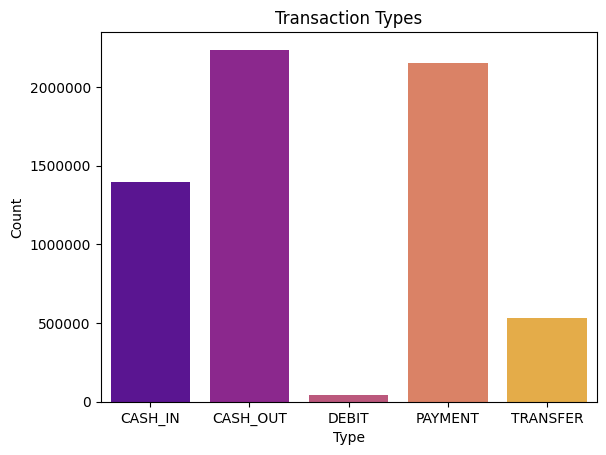

In [88]:
print(df['type'].value_counts())

# Plotting the count of transaction types
sns.countplot(x='type', data=df, palette='plasma', )
plt.title('Transaction Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.ticklabel_format(axis='y', style = 'plain')
plt.show()

# Bivariate

type
CASH_IN     2.363674e+11
CASH_OUT    3.944130e+11
DEBIT       2.271992e+08
PAYMENT     2.809337e+10
TRANSFER    4.852920e+11
Name: amount, dtype: float64


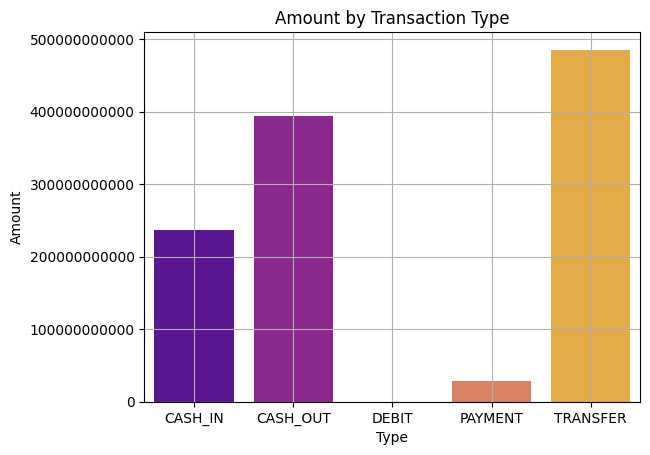

In [90]:
amt_by_type = df.groupby('type')['amount'].sum()
print(amt_by_type)

sns.barplot(x=amt_by_type.index, y=amt_by_type.values, palette='plasma')
plt.title('Amount by Transaction Type')
plt.xlabel('Type')
plt.ylabel('Amount')
plt.ticklabel_format(axis='y', style = 'plain')
plt.grid(True)
plt.show()

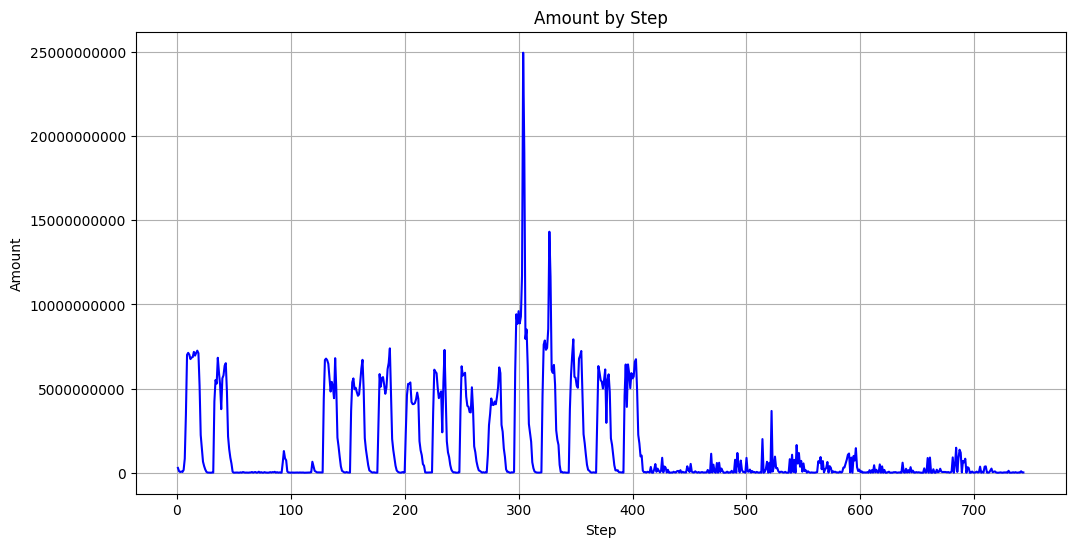

In [102]:
amt_by_step = df.groupby('step')['amount'].sum()

# Plotting the amount by step
plt.figure(figsize=(12, 6))
sns.lineplot(x=amt_by_step.index, y=amt_by_step.values, color='blue')
plt.title('Amount by Step')
plt.xlabel('Step')
plt.ylabel('Amount')
plt.ticklabel_format(axis='y', style = 'plain')
plt.grid(True)
plt.show()

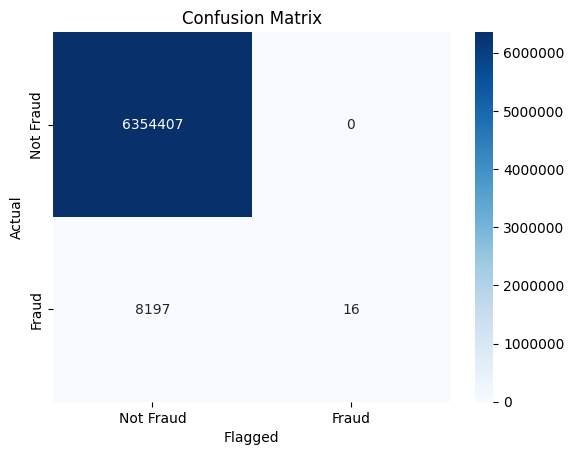

In [122]:
cm = confusion_matrix(df['isFraud'], df['isFlaggedFraud'])

ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Flagged')
plt.ylabel('Actual')

cbar = ax.collections[0].colorbar
cbar.ax.ticklabel_format(style='plain')

plt.title('Confusion Matrix')
plt.show()